# CLaP Classification Gain Visualization
In this notebook, we visualize an example of the classification gain used in CLaP.

In [2]:
# fot type settings for paper plots
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [34]:
import sys
sys.path.append("../../")

import numpy as np
import pandas as pd

from src.visualization import plot_time_series
from src.utils import load_tssb_datasets, load_has_datasets, load_datasets
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score

from src.visualization import plot_state_detection
from src.clap import CLaP

sns.set_theme()
sns.set_color_codes()

import os

Let's first load the data and select the example TS.

In [4]:
df_data = load_tssb_datasets()
df_data

,dataset,window_size,change_points,labels,time_series
0,Adiac,10,"[572, 1012, 1232]","[0, 1, 2, 4]","[0.9614412457648591, 0.8692107351566405, 0.759..."
1,ArrowHead,10,[753],"[0, 1]","[0.05752188882548289, 0.08284899792454914, 0.1..."
2,Beef,50,[705],"[0, 1]","[0.4512759522369589, 0.4557238177439642, 0.464..."
3,BeetleFly,10,[1280],"[0, 1]","[0.7196187944802506, 0.649219323259071, 0.5877..."
4,BirdChicken,20,[1280],"[0, 1]","[0.9251509485227413, 0.8719850886823856, 0.827..."
...,...,...,...,...,...
70,UWaveGestureLibraryX,10,"[600, 1131, 1652, 2193]","[0, 1, 2, 3, 4]","[0.2620301062625416, 0.7167275413990027, 0.758..."
71,UWaveGestureLibraryY,10,"[600, 1131, 1652, 2193]","[0, 1, 2, 3, 4]","[0.07907464308475154, 0.4705975017452629, 0.55..."
72,UWaveGestureLibraryZ,10,"[600, 1131, 1652, 2193]","[0, 1, 2, 3, 4]","[0.34451029248853127, 0.6135219899761898, 0.34..."
73,WordSynonyms,10,"[202, 2227]","[0, 1, 2]","[0.08882013821870599, 0.2019831967427844, 0.20..."


In [5]:
idx = 15
data_row = df_data.iloc[idx]

Now, we load the classification gains (and other scores) for the example.

In [14]:
scores = {}
losses = {}

scores["cgain"] = pd.read_csv("scores/clap_cgain.csv").cgain.to_numpy()
scores["F1"] = pd.read_csv("scores/clap_f1_score.csv").f1_score.to_numpy()
scores["AMI"] = pd.read_csv("scores/clap_adjusted_mutual_info_score.csv").adjusted_mutual_info_score.to_numpy()
losses["Entropy"] = pd.read_csv("scores/clap_neg_log_loss.csv").neg_log_loss.to_numpy()
losses["Hamming"] = pd.read_csv("scores/clap_neg_hamming_loss.csv").neg_hamming_loss.to_numpy()

In [13]:
scores

{'cgain': array([0.51755457, 0.54428903, 0.57470187, 0.58969876, 0.62177743,
        0.65141393]),
 'F1': array([0.64255457, 0.68714617, 0.74136854, 0.78969876, 0.87177743,
        0.98474727, 0.99571292, 1.        ]),
 'AMI': array([0.6157119 , 0.66850939, 0.71275835, 0.77561155, 0.84419507,
        0.9266079 , 0.96513157, 1.        ]),
 'Entropy': array([-10.44212576,  -7.64839913,  -3.34331219]),
 'Hamming': array([-0.28970775, -0.21346887, -0.1639136 , -0.10673443, -0.06226175,
        -0.01524778, -0.00381194, -0.        ])}

We plot the TS and scores.

/var/folders/1m/8xt9fm8d1575s4p3vrgccf7r0000gn/T/ipykernel_3173/3521014664.py:16: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(fontsize)
/var/folders/1m/8xt9fm8d1575s4p3vrgccf7r0000gn/T/ipykernel_3173/3521014664.py:19: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(fontsize)


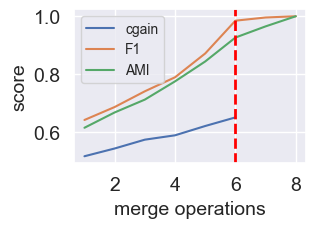

In [28]:
fontsize = 14

_, ax = plt.subplots(1, figsize=(3, 2))

for score_name, values in scores.items():
    ax.plot(np.arange(1, len(values)+1), values, label=score_name)

ax.axvline(x=6, linewidth=2, color='red', linestyle="dashed")

ax.set_xlabel("merge operations", fontsize=fontsize)
ax.set_ylabel("score", fontsize=fontsize)

# ax.set_yticks(np.arange(0, 10_000 + 1_000, 2_000))

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

ax.legend(loc=2, prop={'size': fontsize - 4})
plt.savefig(f"../../figures/merge_scores.pdf", bbox_inches="tight")

/var/folders/1m/8xt9fm8d1575s4p3vrgccf7r0000gn/T/ipykernel_3173/3112222146.py:16: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(fontsize)
/var/folders/1m/8xt9fm8d1575s4p3vrgccf7r0000gn/T/ipykernel_3173/3112222146.py:19: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(fontsize)


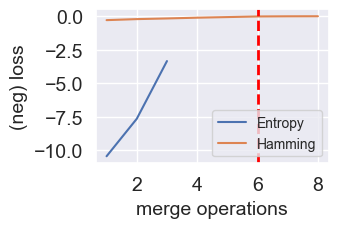

In [33]:
fontsize = 14

_, ax = plt.subplots(1, figsize=(3, 2))

for loss_name, values in losses.items():
    ax.plot(np.arange(1, len(values)+1), values, label=loss_name)

ax.axvline(x=6, linewidth=2, color='red', linestyle="dashed")

ax.set_xlabel("merge operations", fontsize=fontsize)
ax.set_ylabel("(neg) loss", fontsize=fontsize)

# ax.set_yticks(np.arange(0, 10_000 + 1_000, 2_000))

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

ax.legend(loc=4, prop={'size': fontsize - 4})
plt.savefig(f"../../figures/merge_losses.pdf", bbox_inches="tight")

<Figure size 640x480 with 0 Axes>

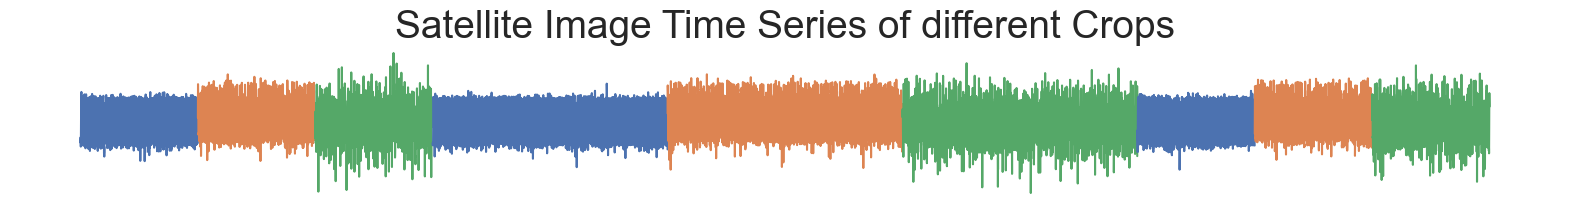

In [42]:
ax = plot_time_series("Satellite Image Time Series of different Crops", data_row.time_series, change_points=data_row.change_points, labels=data_row.labels, file_path=None, font_size=28)

ax.set_facecolor((1., 1., 1.))

ax.tick_params(
    axis='both',          
    which='both',      
    labelbottom=False,
    labelleft=False
)

plt.savefig(f"../../figures/crop.pdf", bbox_inches="tight")